<a href="https://colab.research.google.com/github/johnjar99/curso_python-/blob/main/2_DL_Keras_API_funcional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creación de arquitecturas de aprendizaje profundo mediante API funcional de Keras.

- Se presentan los consideraciones básicas respecto a la [API funcional de Keras](https://keras.io/guides/functional_api/) para la implementación de modelos de redes profundas con TensorFlow.



In [1]:
import tensorflow as tf #importar tensorflow
print(tf.__version__)

2.9.2


- Se utilizará la base de datos Fashion Mnist nuevamente, normalizando las imágenes de 0 a 1.

In [2]:
train, test    = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

- Se presenta un ejemplo de la base de datos

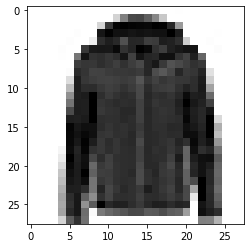

In [4]:
import matplotlib.pyplot as plt
plt.imshow(images[5000,:,:],cmap= 'binary')
plt.show()

In [5]:
import numpy as np
print(np.unique(labels)) #etiquetas
print(images.shape) #tamaño de las imágenes

[0 1 2 3 4 5 6 7 8 9]
(60000, 28, 28)


In [6]:
Xtrain, ytrain = train
Xtrain = Xtrain/255 # tipo flotante, normalizados de 0 a 1
Xtest, ytest = test
Xtest = Xtest/255 # tipo flotante, normalizados de 0 a 1

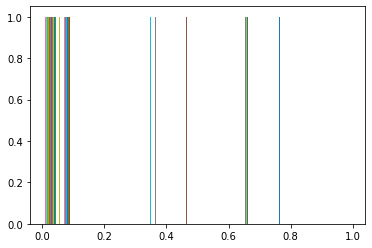

In [7]:
tmp = Xtest[0].reshape(1,-1)
plt.figure()
plt.hist(tmp)
plt.show()

- En el cuaderno introductorio a redes neuronales con tensorflow se planteó la construcción de modelos mediante secuencia de capas:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 red1 (Dense)                (None, 200)               157000    
                                                                 
 hred2 (Dense)               (None, 50)                10050     
                                                                 
 output (Dense)              (None, 10)                510       
                                                                 
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


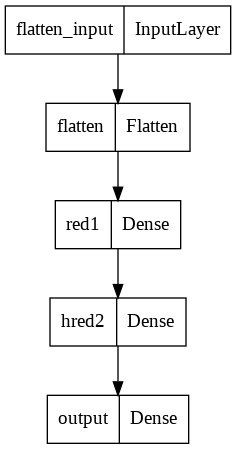

In [8]:
#definir arquitectura secuencial
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2])),
    tf.keras.layers.Dense(200,activation="relu", name='red1'),
    tf.keras.layers.Dense(50, activation="tanh",name='hred2'),
    tf.keras.layers.Dense(10,activation='softmax',name='output')
])

model.summary() # resumen del modelo
tf.keras.utils.plot_model(model) #diagrama del modelo

- Aunque la implementacióm mediante secuencia es intuitiva, no permite realizar conexiones flexibles entre capas.

- En ese sentido, Keras permite crear capas bajo el principio de funciones y argumentos, como se muestra a continuación.

**Nota**: a diferencia de la estructura secuencial, en la API funcional se debe indicar la capa o capas de entrada y la capa o capas de salida para crear el grafo computacional de forma apropiada.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 entrada (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 h1 (Dense)                  (None, 200)               157000    
                                                                 
 h2 (Dense)                  (None, 50)                10050     
                                                                 
 output (Dense)              (None, 10)                510       
                                                                 
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


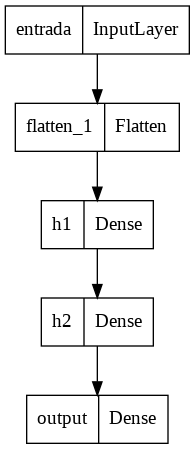

In [9]:
#arquitectura funcional
#capa de entrada
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
#capa de aplanamiento de las imágenes
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)#argumento de entrada
#capas densas
h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)#argumento de entrada
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
#capa de salida
output = tf.keras.layers.Dense(10,activation="softmax",name='output')(h2)
#crear modelo según conexiones tipo funcionales
model_fun = tf.keras.Model(inputs=input_l,outputs=output)

#resumen y gráfica del modelo
model_fun.summary()
tf.keras.utils.plot_model(model_fun)


# La API funcional permite realizar conexiones más flexibles

- En el siguiente ejemplo se crea un modelo con una entrada y dos salidas con interconexiones flexibles:

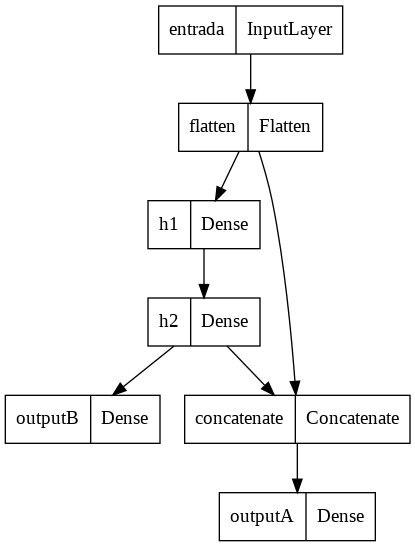

In [10]:
#arquitectura funcional 2 
tf.keras.backend.clear_session() # limpiamos la sesión de tf y keras para evitar contaminación de modelos
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)

h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h2,flatten])
#se crean dos salidas:
output_A = tf.keras.layers.Dense(10,activation="softmax",name='outputA')(concat)#desde concatenación
output_B = tf.keras.layers.Dense(10,activation="softmax",name='outputB')(h2)#desde h2
#las entradas y salidas se ingresan como listas
model_fun = tf.keras.Model(inputs=input_l,outputs=[output_A, output_B])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun)

In [11]:
model_fun.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 entrada (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten (Flatten)              (None, 784)          0           ['entrada[0][0]']                
                                                                                                  
 h1 (Dense)                     (None, 200)          157000      ['flatten[0][0]']                
                                                                                                  
 h2 (Dense)                     (None, 50)           10050       ['h1[0][0]']                     
                                                                                              

**Nota**: si se cuenta con varias salidas se puede definir un mismo costo para cada salida, o una lista con los costos requeridos. Además, en la lista `loss_weights` se puede especificar el valor del peso asociado al costo de cada salida en el intervalo [0,1].

In [12]:
model.compile(loss="sparse_categorical_crossentropy", #custom_loss(),#custom_loss(),#"sparse_categorical_crossentropy",
              optimizer="Adam", 
              metrics="accuracy") #f1, precision, recall, crossentropy


- El entrenamiento se realiza de igual forma al utilizado con el modelo secuencial.

- Como se fijaron dos salidas, se debe ingresar una lista para los argumentos ytrain.

In [13]:
history = model.fit(Xtrain, ytrain , epochs=10,batch_size=64, # 32, 64, 128, 256
                    validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 5s 4ms/step - loss: 0.5045 - accuracy: 0.8204 - val_loss: 0.4374 - val_accuracy: 0.8293
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3757 - accuracy: 0.8636 - val_loss: 0.3898 - val_accuracy: 0.8581
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3341 - accuracy: 0.8773 - val_loss: 0.3513 - val_accuracy: 0.8708
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3083 - accuracy: 0.8863 - val_loss: 0.3234 - val_accuracy: 0.8814
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2893 - accuracy: 0.8930 - val_loss: 0.3358 - val_accuracy: 0.8777
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2749 - accuracy: 0.8974 - val_loss: 0.3330 - val_accuracy: 0.8772
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2621 - accuracy: 0.9026 - val_loss: 0.3216 - val_accuracy: 0.8835
Epoch 

In [21]:
model_fun.compile(loss="sparse_categorical_crossentropy", #custom_loss(),#custom_loss(),#"sparse_categorical_crossentropy",
              optimizer="Adam", 
              metrics="accuracy")

In [15]:
history = model.fit(Xtrain, [ytrain,ytrain] , epochs=10,batch_size=64, # 32, 64, 128, 256
                    validation_split=0.1) # se fija el conjunto de validación como el 20% del de train

Epoch 1/10
844/844 [==============================] - 5s 6ms/step - loss: 0.2337 - accuracy: 0.9133 - val_loss: 0.3320 - val_accuracy: 0.8802
Epoch 2/10
844/844 [==============================] - 3s 3ms/step - loss: 0.2238 - accuracy: 0.9166 - val_loss: 0.3019 - val_accuracy: 0.8888
Epoch 3/10
844/844 [==============================] - 2s 3ms/step - loss: 0.2157 - accuracy: 0.9198 - val_loss: 0.3127 - val_accuracy: 0.8900
Epoch 4/10
844/844 [==============================] - 2s 3ms/step - loss: 0.2053 - accuracy: 0.9234 - val_loss: 0.3126 - val_accuracy: 0.8910
Epoch 5/10
844/844 [==============================] - 2s 3ms/step - loss: 0.2040 - accuracy: 0.9237 - val_loss: 0.3262 - val_accuracy: 0.8827
Epoch 6/10
844/844 [==============================] - 3s 3ms/step - loss: 0.1964 - accuracy: 0.9257 - val_loss: 0.3057 - val_accuracy: 0.8905
Epoch 7/10
844/844 [==============================] - 3s 3ms/step - loss: 0.1862 - accuracy: 0.9299 - val_loss: 0.3041 - val_accuracy: 0.8917
Epoch 

- Se presentan las curvas de desempeño:

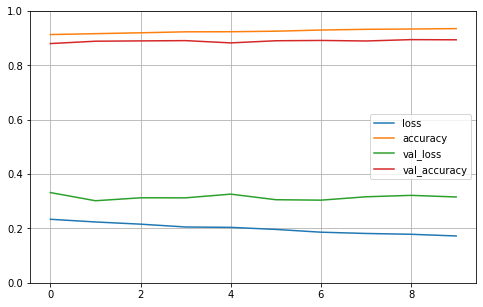

In [16]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

- Como el modelo generado presenta dos salidas, el rendimiento se discrimina por cada salida y el acumulado.

- A la hora de predecir la salida para una nueva muestra, se debe tener en cuenta la cantidad de salidas fijadas.

In [17]:
yestA,yestB = model_fun.predict(Xtest)
print(yestA.shape,yestB.shape)#salidas tipo 1 -K probabilidad de membresia a cada clase

313/313 [==============================] - 1s 1ms/step
(10000, 10) (10000, 10)


In [18]:
yestA

array([[0.09412047, 0.11436684, 0.18276128, ..., 0.10922207, 0.07601812,
        0.05783518],
       [0.2293313 , 0.15215254, 0.13184108, ..., 0.05285051, 0.0418328 ,
        0.02393741],
       [0.08298881, 0.21015947, 0.27278164, ..., 0.05342955, 0.08808198,
        0.05011798],
       ...,
       [0.11435747, 0.11576905, 0.11557568, ..., 0.10614611, 0.11967672,
        0.05397921],
       [0.06877408, 0.17209765, 0.20453404, ..., 0.08848647, 0.08032534,
        0.04483425],
       [0.10230388, 0.08475643, 0.14428078, ..., 0.08763526, 0.07664798,
        0.06932422]], dtype=float32)

In [19]:
print(yestA[0].argmax(),ytest[0])#para estimar la etiqueta ordinal se encuentra el max por columnas

2 9


In [22]:
scoreA = model_fun.evaluate(Xtest,ytest)#evaluacion
print(scoreA)

313/313 [==============================] - 1s 3ms/step - loss: 4.9145 - outputA_loss: 2.4330 - outputB_loss: 2.4815 - outputA_accuracy: 0.1248 - outputB_accuracy: 0.0689
[4.9144816398620605, 2.4330248832702637, 2.481459140777588, 0.12479999661445618, 0.06889999657869339]


# Grafiquemos los pesos respecto a las dimensiones de la imagen original

In [23]:
model.layers[1].get_weights()[0].shape

(784, 200)

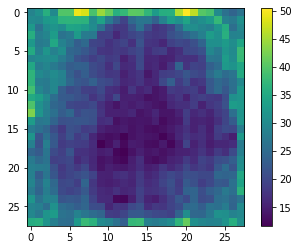

In [24]:
#se busca identificar las entradas más relevantes para la red
plt.imshow(abs(model.layers[1].get_weights()[0]).sum(axis=1).reshape(28,28))
plt.colorbar()
plt.show()

In [25]:
model_fun.layers[2].get_weights()[1].shape # accediendo a los bias

(200,)

# Salidas parciales de la red

- La estrategia funcional nos permite acceder a partes intermedias de la red para encontrar mapas de características y verificar el aprendizaje de la representación.

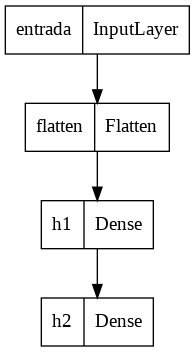

In [26]:
#crear nuevo modelo con salida parcial
model_B = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('h2').output) #se accede a capas por nombre
tf.keras.utils.plot_model(model_B) # modelo ya esta ajustado!


In [27]:
z = model_B.predict(Xtest) # salida en h2
z.shape

313/313 [==============================] - 0s 1ms/step


(10000, 50)

### Dado que se fijaron 50 unidades, se pueden utilizar técnicas de reducción de dimensión para visualizar los patrones intermedios de la red en 2D.

In [28]:
from sklearn.decomposition import PCA
zpca = PCA(n_components=2).fit_transform(z)
zpca.shape

(10000, 2)

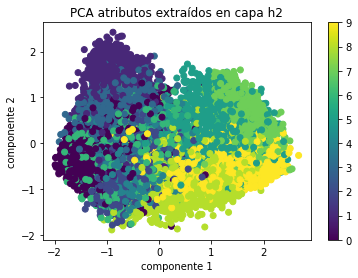

In [29]:
plt.scatter(zpca[:,0],zpca[:,1],c=ytest)
plt.colorbar()
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa h2')
plt.show()

In [30]:
#plot mnist 2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def plot_mnist_2d(Z,y,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(16,10))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

- También, podemos revisar la distribución de las imágenes en el espacio proyectado:

Text(0.5, 1.0, 'PCA atributos extraídos en capa h2')

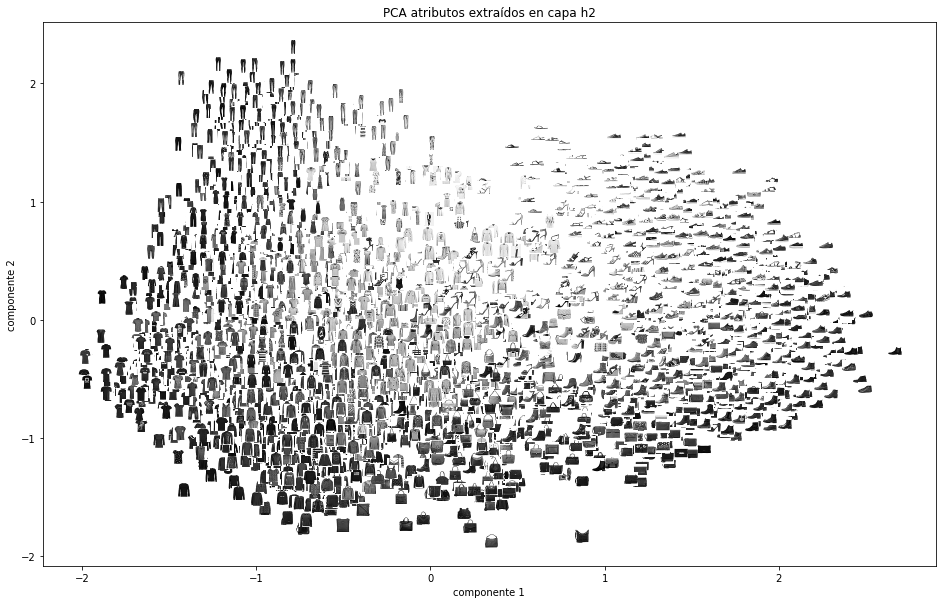

In [31]:
Ni =4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(zpca[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa h2')

# Ejercicio:

- Grafique el espacio proyectado de PCA en 2D (etiquetas e imágenes) para los atributos aprendidos por la capa de concatenación.

- Repita el proceso aplicando la técnica de reducción de dimensión [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). Nota: escoja un subconjunto aleatorio de 4000 datos para que el algoritmo t-SNE converja sin problemas de memoría.

- Plantee una nueva arquitectura tipo funcional utilizando capas convolucionales (Ver cuaderno [CNNs](https://github.com/amalvarezme/AnaliticaDatos/blob/master/5_Aprendizaje_Profundo/3_Introduccion_CNN.ipynb)) para el entrenamiento de la base de datos Mnist-digitos, utilizando tres entradas: i) imágenes limpias, ii) y iii) imágenes con ruido blanco Gaussiano ante diferentes varianzas, y dos salidas i) estimación del digito, ii) estimación número par número impar. 

Punto 1

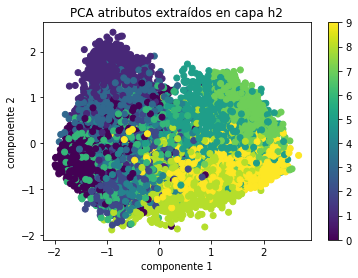

Text(0.5, 1.0, 'PCA atributos extraídos en capa h2')

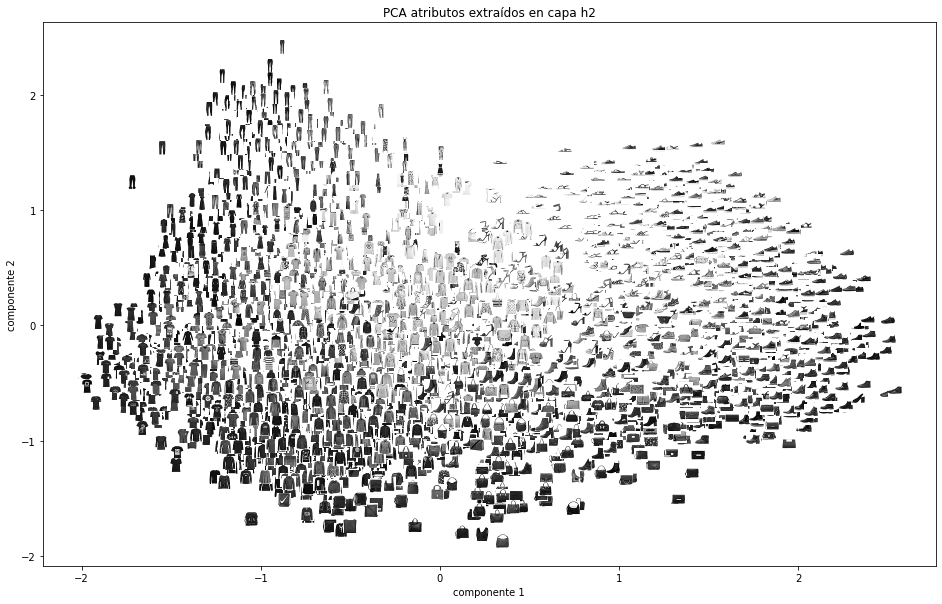

In [32]:
model_B = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('h2').output) 
tf.keras.utils.plot_model(model_B) 
from sklearn.decomposition import PCA
zpca = PCA(n_components=2).fit_transform(z)
zpca.shape
plt.scatter(zpca[:,0],zpca[:,1],c=ytest)
plt.colorbar()
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa h2')
plt.show()
Ni =4000 
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(zpca[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa h2')

In [ ]:
Punto 2

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


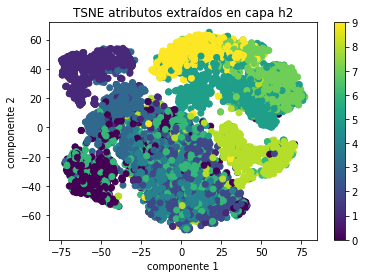

Text(0.5, 1.0, 'TSNE atributos extraídos en capa h2')

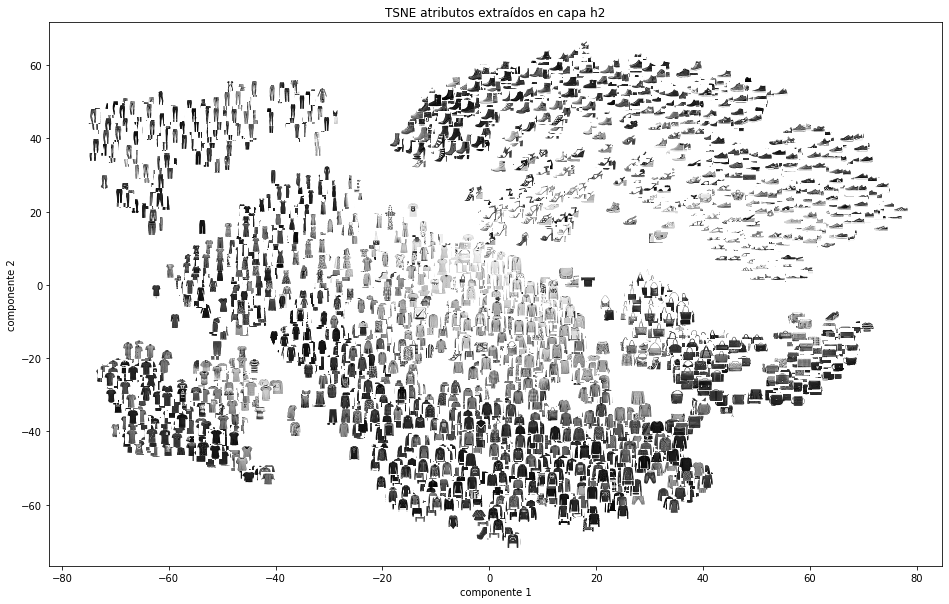

In [54]:
model_B = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('h2').output)
tf.keras.utils.plot_model(model_B) 
from sklearn.manifold import TSNE
zpca = TSNE(n_components=2).fit_transform(z)
zpca.shape
plt.scatter(zpca[:,0],zpca[:,1],c=ytest)
plt.colorbar()
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('TSNE atributos extraídos en capa h2')
plt.show()
Ni =4000 
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(zpca[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('TSNE atributos extraídos en capa h2')

Punto 3

In [34]:
#Ayuda de código:
#cargar fashion mnist o mnist
#(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_valid = X_train[:-55000], X_train[-55000:]
y_train, y_valid = y_train[:-55000], y_train[-55000:]
 
X_train = X_train[..., np.newaxis]/255.
X_valid = X_valid[..., np.newaxis]/255.
X_test = X_test[..., np.newaxis]/255.
print(X_train.shape,X_valid.shape,X_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(5000, 28, 28, 1) (55000, 28, 28, 1) (10000, 28, 28, 1)


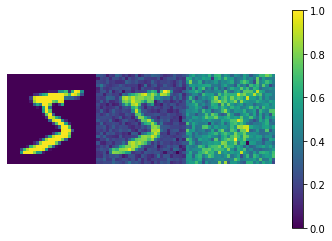

In [35]:
#crear entradas con y sin ruido
from sklearn.preprocessing import MinMaxScaler

var_ = [0.01,0.25]
inputs_train = [X_train]
inputs_valid = [X_valid]
inputs_test = [X_test]

#recorrer varianzas
for var_i in var_: 
    dim = X_train.shape
    #definir ruido
    tmp = X_train + (np.sqrt(var_i)*np.random.randn(X_train.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T #fijar señal con ruido de 0 a 1
    inputs_train += [tmp.reshape(dim)]

    dim = X_valid.shape
    tmp = X_valid + (np.sqrt(var_i)*np.random.randn(X_valid.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_valid += [tmp.reshape(dim)]

    dim = X_test.shape
    tmp = X_test + (np.sqrt(var_i)*np.random.randn(X_test.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_test += [tmp.reshape(dim)]

    
plt.imshow(np.c_[inputs_train[0][0,:,:,0],inputs_train[1][0,:,:,0],inputs_train[2][0,:,:,0]])
plt.axis('off')
plt.colorbar()
plt.show()

In [36]:
#veector de salida par o impar
ytrain_B = (ytrain % 2)
print(ytrain_B[10:])
print(ytrain[10:])

[0 1 1 ... 1 0 1]
[0 9 5 ... 3 0 5]


In [61]:
shape=Xtrain.reshape(Xtrain.shape[0],Xtrain.shape[1],Xtrain.shape[2],1).shape

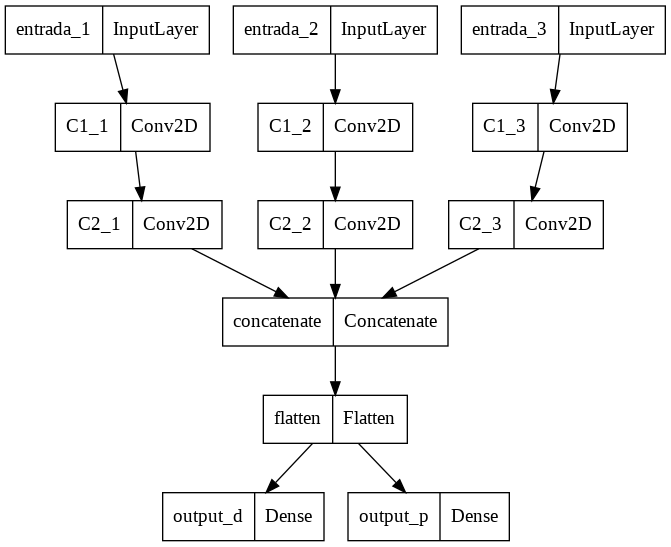

In [64]:
#arquitectura funcional 2 - Ayuda de código con capas densas - cambiar a capas cnn
tf.keras.backend.clear_session()
input_1 = tf.keras.layers.Input(shape=(shape[1],shape[2],shape[3]), name='entrada_1')
input_2 = tf.keras.layers.Input(shape=(shape[1],shape[2],shape[3]), name='entrada_2')
input_3 = tf.keras.layers.Input(shape=(shape[1],shape[2],shape[3]), name='entrada_3')

h1_1 = tf.keras.layers.Conv2D(32,3,activation='tanh',name='C1_1')(input_1)
h2_1 = tf.keras.layers.Conv2D(32,3,activation='tanh',name='C1_2')(input_2)
h3_1 = tf.keras.layers.Conv2D(32,3,activation='tanh',name='C1_3')(input_3)

h1_2 = tf.keras.layers.Conv2D(32,3,activation='tanh',name='C2_1')(h1_1)
h2_2 = tf.keras.layers.Conv2D(32,3,activation='tanh',name='C2_2')(h2_1)
h3_2 = tf.keras.layers.Conv2D(32,3,activation='tanh',name='C2_3')(h3_1)

#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h1_2,h2_2,h3_2])
F=tf.keras.layers.Flatten()(concat)
#se crean dos salidas:
output_d = tf.keras.layers.Dense(10,activation="softmax",name='output_d')(F)#desde concatenación
output_p = tf.keras.layers.Dense(1,activation="sigmoid",name='output_p')(F)#desde h2
#las entradas y salidas se ingresan como listas
model_fun2 = tf.keras.Model(inputs=[input_1,input_2,input_3],outputs=[output_d, output_p])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun2)

In [67]:
model_fun2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 entrada_1 (InputLayer)         [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 entrada_2 (InputLayer)         [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 entrada_3 (InputLayer)         [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 C1_1 (Conv2D)                  (None, 26, 26, 32)   320         ['entrada_1[0][0]']              
                                                                                              

In [65]:
#Entrenar y ajustar el modelo, revisar rendimientos en cada salida
model_fun2.compile(loss=['sparse_categorical_crossentropy','binary_crossentropy'],optimizer='Adam',metrics='Accuracy')

In [66]:
history=model_fun2.fit(inputs_train,[ytrain,ytrain_B],epochs=10,batch_size=32,validation_split=0.3)

Epoch 1/10
110/110 [==============================] - 10s 13ms/step - loss: 3.1320 - output_d_loss: 2.4126 - output_p_loss: 0.7194 - output_d_Accuracy: 0.0900 - output_p_Accuracy: 0.5017 - val_loss: 3.0331 - val_output_d_loss: 2.3296 - val_output_p_loss: 0.7035 - val_output_d_Accuracy: 0.1080 - val_output_p_Accuracy: 0.5087
Epoch 2/10
110/110 [==============================] - 1s 13ms/step - loss: 2.7394 - output_d_loss: 2.0655 - output_p_loss: 0.6739 - output_d_Accuracy: 0.2743 - output_p_Accuracy: 0.5740 - val_loss: 3.2274 - val_output_d_loss: 2.5151 - val_output_p_loss: 0.7123 - val_output_d_Accuracy: 0.1100 - val_output_p_Accuracy: 0.5220
Epoch 3/10
110/110 [==============================] - 2s 14ms/step - loss: 2.3509 - output_d_loss: 1.7154 - output_p_loss: 0.6355 - output_d_Accuracy: 0.4300 - output_p_Accuracy: 0.6511 - val_loss: 3.6333 - val_output_d_loss: 2.8686 - val_output_p_loss: 0.7647 - val_output_d_Accuracy: 0.1040 - val_output_p_Accuracy: 0.5173
Epoch 4/10
110/110 [====